# Case Study - We are going to analyse and predict the data of the hourly vehicle counts of particular highway in the year of 1995 beginning from the month of August.

#### Import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

## 1. Read the data as an hourly Time Series from the '.csv' file and plot the Time Series data.

In [2]:
df = pd.read_csv('Vehicle.csv')
df.head()

,Hour,Vehicles
0,1,699
1,2,346
2,3,193
3,4,191
4,5,193


In [4]:
date = pd.date_range(start='08/01/1995',periods=1689,freq='H')
date

DatetimeIndex(['1995-08-01 00:00:00', '1995-08-01 01:00:00',
               '1995-08-01 02:00:00', '1995-08-01 03:00:00',
               '1995-08-01 04:00:00', '1995-08-01 05:00:00',
               '1995-08-01 06:00:00', '1995-08-01 07:00:00',
               '1995-08-01 08:00:00', '1995-08-01 09:00:00',
               ...
               '1995-10-09 23:00:00', '1995-10-10 00:00:00',
               '1995-10-10 01:00:00', '1995-10-10 02:00:00',
               '1995-10-10 03:00:00', '1995-10-10 04:00:00',
               '1995-10-10 05:00:00', '1995-10-10 06:00:00',
               '1995-10-10 07:00:00', '1995-10-10 08:00:00'],
              dtype='datetime64[ns]', length=1689, freq='H')

In [5]:
df['Time_Stamp'] = date
df.head()

,Hour,Vehicles,Time_Stamp
0,1,699,1995-08-01 00:00:00
1,2,346,1995-08-01 01:00:00
2,3,193,1995-08-01 02:00:00
3,4,191,1995-08-01 03:00:00
4,5,193,1995-08-01 04:00:00


In [6]:
df.set_index(keys='Time_Stamp',inplace=True)
df.head()

,Hour,Vehicles
Time_Stamp,,
1995-08-01 00:00:00,1,699
1995-08-01 01:00:00,2,346
1995-08-01 02:00:00,3,193
1995-08-01 03:00:00,4,191
1995-08-01 04:00:00,5,193


In [7]:
df.drop('Hour',axis=1,inplace=True)
df.head()

,Vehicles
Time_Stamp,
1995-08-01 00:00:00,699
1995-08-01 01:00:00,346
1995-08-01 02:00:00,193
1995-08-01 03:00:00,191
1995-08-01 04:00:00,193


In [8]:
rcParams['figure.figsize'] = 15,8

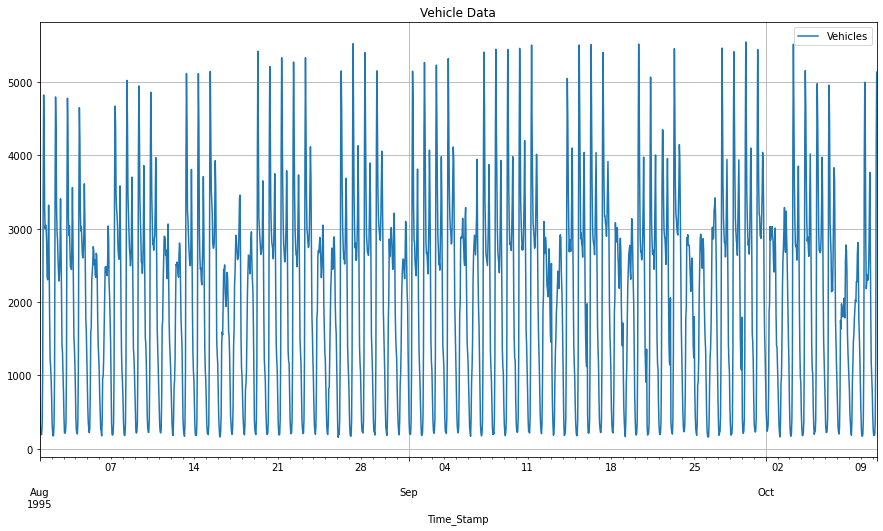

In [9]:
df.plot(title='Vehicle Data', grid=True);

## 2. Check the basic measures of descriptive statistics of the Time Series. Also, check how many days of data do we have and plot the Time Series with the mean and median of the Time Series.

In [10]:
df.describe()

,Vehicles
count,1689.000000
mean,2060.417999
std,1339.545842
min,154.000000
25%,851.000000
50%,2262.000000
75%,2924.000000
max,5549.000000


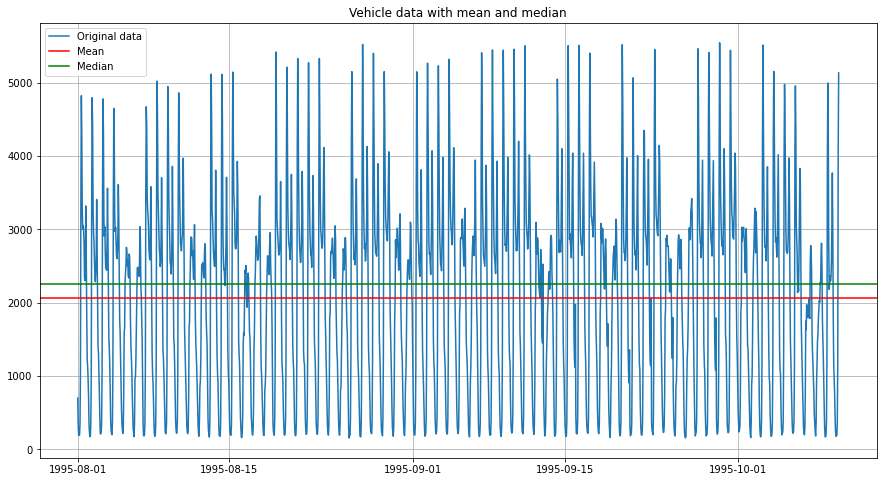

In [15]:
plt.plot(df['Vehicles']);
plt.axhline(df['Vehicles'].mean(),color='Red')
plt.axhline(df['Vehicles'].median(),color='Green')
plt.legend(['Original data','Mean','Median'],loc='best');
plt.grid();
plt.title('Vehicle data with mean and median');

In [16]:
print(f'We have around {1689/24} days of data');

We have around 70.375 days of data


## 3. Decompose the Time Series to understand the various components.

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
df_decompose = seasonal_decompose(df,model='multiplicative')

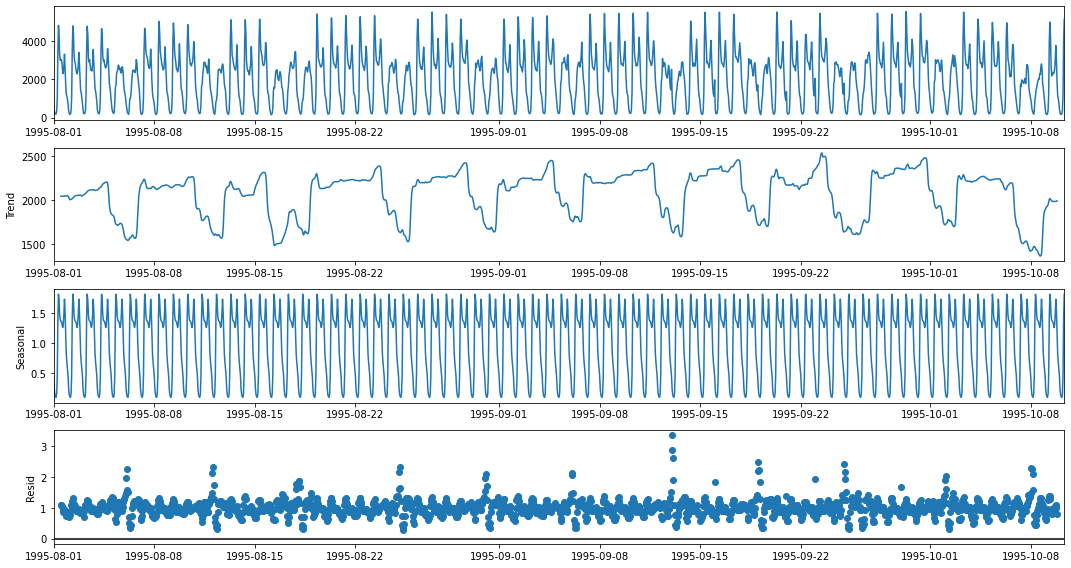

In [21]:
df_decompose.plot();

In [23]:
print('Trend','\n',df_decompose.trend,'\n')
print('Seasonality','\n',df_decompose.seasonal,'\n')
print('Error','\n',df_decompose.resid,'\n')

Trend 
 Time_Stamp
1995-08-01 00:00:00   NaN
1995-08-01 01:00:00   NaN
1995-08-01 02:00:00   NaN
1995-08-01 03:00:00   NaN
1995-08-01 04:00:00   NaN
                       ..
1995-10-10 04:00:00   NaN
1995-10-10 05:00:00   NaN
1995-10-10 06:00:00   NaN
1995-10-10 07:00:00   NaN
1995-10-10 08:00:00   NaN
Name: trend, Length: 1689, dtype: float64 

Seasonality 
 Time_Stamp
1995-08-01 00:00:00    0.455006
1995-08-01 01:00:00    0.239579
1995-08-01 02:00:00    0.146309
1995-08-01 03:00:00    0.112478
1995-08-01 04:00:00    0.103107
                         ...   
1995-10-10 04:00:00    0.103107
1995-10-10 05:00:00    0.159886
1995-10-10 06:00:00    0.468012
1995-10-10 07:00:00    1.424237
1995-10-10 08:00:00    1.806399
Name: seasonal, Length: 1689, dtype: float64 

Error 
 Time_Stamp
1995-08-01 00:00:00   NaN
1995-08-01 01:00:00   NaN
1995-08-01 02:00:00   NaN
1995-08-01 03:00:00   NaN
1995-08-01 04:00:00   NaN
                       ..
1995-10-10 04:00:00   NaN
1995-10-10 05:00:00   NaN


## 4. Split the data into train and test and plot the training and test data.

In [24]:
train    =   df[0:int(len(df)*0.7)] 
test     =   df[int(len(df)*0.7):]

In [25]:
train.head()

,Vehicles
Time_Stamp,
1995-08-01 00:00:00,699
1995-08-01 01:00:00,346
1995-08-01 02:00:00,193
1995-08-01 03:00:00,191
1995-08-01 04:00:00,193


In [26]:
train.tail()

,Vehicles
Time_Stamp,
1995-09-19 01:00:00,1015
1995-09-19 02:00:00,559
1995-09-19 03:00:00,353
1995-09-19 04:00:00,226
1995-09-19 05:00:00,163


In [27]:
test.head()

,Vehicles
Time_Stamp,
1995-09-19 06:00:00,359
1995-09-19 07:00:00,886
1995-09-19 08:00:00,1125
1995-09-19 09:00:00,1753
1995-09-19 10:00:00,2224


In [28]:
train.shape

(1182, 1)

In [29]:
test.shape

(507, 1)

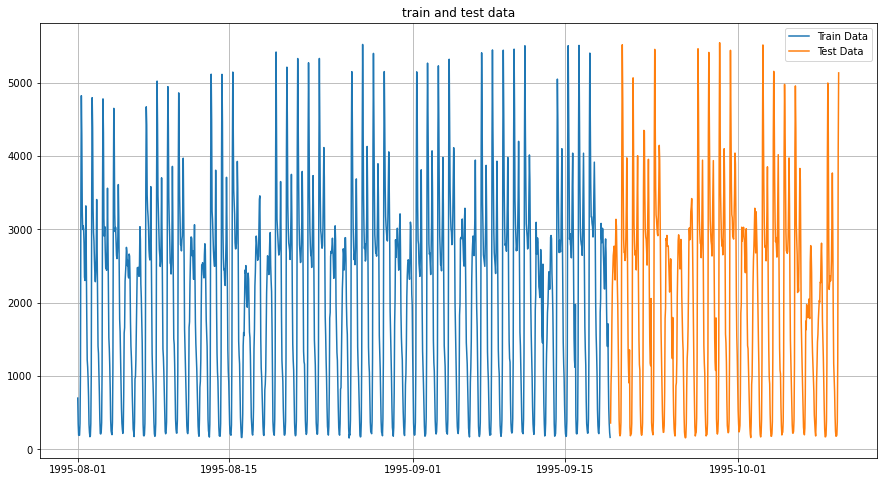

In [30]:
plt.plot(train,label='Train Data');
plt.plot(test,label='Test Data');

plt.legend(loc='best');
plt.grid();
plt.title('train and test data');

## Model 1: Build a Linear Regression using the Time Stamped order of occurence of the vehicle count.

In [31]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+1183 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 21

In [32]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [33]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [34]:
print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Vehicles,time
Time_Stamp,,
1995-08-01 00:00:00,699,1
1995-08-01 01:00:00,346,2
1995-08-01 02:00:00,193,3
1995-08-01 03:00:00,191,4
1995-08-01 04:00:00,193,5


Last few rows of Training Data


,Vehicles,time
Time_Stamp,,
1995-09-19 01:00:00,1015,1178
1995-09-19 02:00:00,559,1179
1995-09-19 03:00:00,353,1180
1995-09-19 04:00:00,226,1181
1995-09-19 05:00:00,163,1182


First few rows of Test Data


,Vehicles,time
Time_Stamp,,
1995-09-19 06:00:00,359,1183
1995-09-19 07:00:00,886,1184
1995-09-19 08:00:00,1125,1185
1995-09-19 09:00:00,1753,1186
1995-09-19 10:00:00,2224,1187


Last few rows of Test Data


,Vehicles,time
Time_Stamp,,
1995-10-10 04:00:00,194,1685
1995-10-10 05:00:00,373,1686
1995-10-10 06:00:00,1218,1687
1995-10-10 07:00:00,4076,1688
1995-10-10 08:00:00,5137,1689


In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
LR = LinearRegression()

In [37]:
LR.fit(LinearRegression_train[['time']],LinearRegression_train['Vehicles'])

LinearRegression()

In [38]:
train_pred_model1 = LR.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_pred_model1

test_pred_model1 = LR.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_pred_model1

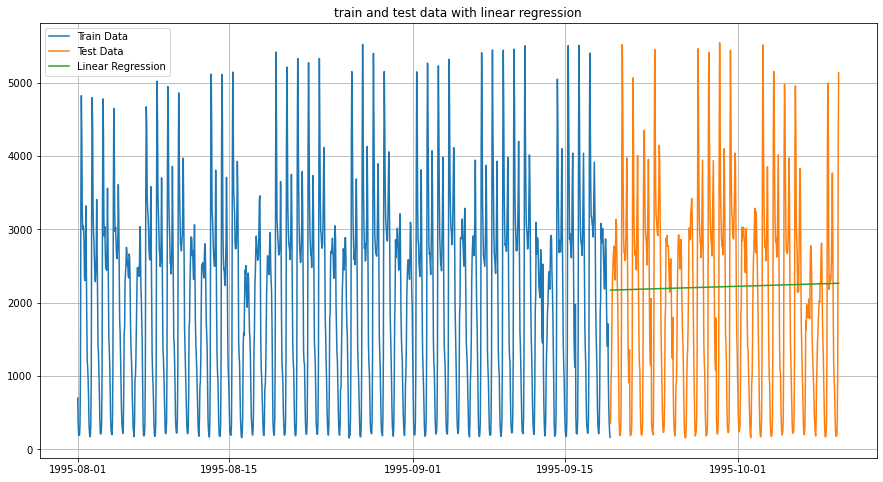

In [39]:
plt.plot(train,label='Train Data');
plt.plot(test,label='Test Data');
plt.plot(LinearRegression_test['RegOnTime'],label='Linear Regression')

plt.legend(loc='best');
plt.grid();
plt.title('train and test data with linear regression');

## Evaluate this model on the test data using Root Mean Squared Error (RMSE).

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
LinearReg_RMSE = mean_squared_error(LinearRegression_test['Vehicles'],test_pred_model1,squared=False)

In [43]:
result_df = pd.DataFrame({'test_RMSE' : LinearReg_RMSE},index=['LinearRegression_RMSE'])
result_df

,test_RMSE
LinearRegression_RMSE,1362.674158


## Model 2: Build a Simple Exponential Smoothing model by using the parameter 'optimise=True' within the '.fit()' function. Then,evaluate the same model on the test set using RMSE.

In [44]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt

In [45]:
SES_train = train.copy()
SES_test = test.copy()

In [49]:
model_SES = SimpleExpSmoothing(SES_train,initialization_method='estimated')

C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [50]:
model_SES_autofit = model_SES.fit()

C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [51]:
model_SES_autofit.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': -1197.6666666666658,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [52]:
SES_Predict = model_SES_autofit.forecast(steps=len(SES_test))
SES_Predict

1995-09-19 06:00:00    163.318201
1995-09-19 07:00:00    163.318201
1995-09-19 08:00:00    163.318201
1995-09-19 09:00:00    163.318201
1995-09-19 10:00:00    163.318201
                          ...    
1995-10-10 04:00:00    163.318201
1995-10-10 05:00:00    163.318201
1995-10-10 06:00:00    163.318201
1995-10-10 07:00:00    163.318201
1995-10-10 08:00:00    163.318201
Freq: H, Length: 507, dtype: float64

In [53]:
SES_RMSE = mean_squared_error(SES_test,SES_Predict,squared=False)
SES_RMSE

2322.773949796665

In [54]:
SES_df = pd.DataFrame({'test_RMSE' : SES_RMSE},index=['SES_RMSE'])
SES_df

,test_RMSE
SES_RMSE,2322.77395


In [56]:
result_df = pd.concat([result_df,SES_df])
result_df

,test_RMSE
LinearRegression_RMSE,1362.674158
SES_RMSE,2322.773950


## Model 3: Build a Double Exponential Smoothing model by using the parameter 'optimise=True' within the '.fit()' function. Then,evaluate the same model on the test set using RMSE.

In [57]:
DES_train = train.copy()
DES_test = test.copy()

In [58]:
model_DES = Holt(DES_train['Vehicles'])

C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [59]:
model_DES = model_DES.fit()

C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [61]:
model_DES.params_formatted

,name,param,optimized
smoothing_level,alpha,0.995,True
smoothing_trend,beta,0.995,True
initial_level,l.0,699.000,True
initial_trend,b.0,-353.000,True


In [62]:
DES_Predict = model_DES.forecast(steps=len(DES_test))
DES_Predict

1995-09-19 06:00:00       99.451324
1995-09-19 07:00:00       36.222309
1995-09-19 08:00:00      -27.006706
1995-09-19 09:00:00      -90.235721
1995-09-19 10:00:00     -153.464736
                           ...     
1995-10-10 04:00:00   -31641.514216
1995-10-10 05:00:00   -31704.743231
1995-10-10 06:00:00   -31767.972246
1995-10-10 07:00:00   -31831.201261
1995-10-10 08:00:00   -31894.430276
Freq: H, Length: 507, dtype: float64

In [63]:
DES_RMSE = mean_squared_error(DES_test,DES_Predict,squared=False)
DES_RMSE

20198.794201121087

In [64]:
DES_df = pd.DataFrame({'test_RMSE' : DES_RMSE},index=['DES_RMSE'])
DES_df

,test_RMSE
DES_RMSE,20198.794201


In [65]:
result_df = pd.concat([result_df,DES_df])
result_df

,test_RMSE
LinearRegression_RMSE,1362.674158
SES_RMSE,2322.773950
DES_RMSE,20198.794201


## Model 4: Build a Triple Exponential Smoothing model by using the parameter 'optimise=True' within the '.fit()' function. Then,evaluate the same model on the test set using RMSE.

In [66]:
TES_train = train.copy()
TES_test = test.copy()

In [67]:
model_TES = ExponentialSmoothing(TES_train['Vehicles'],trend='additive',seasonal='multiplicative')

C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [68]:
model_TES = model_TES.fit()

C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [69]:
model_TES.params_formatted

,name,param,optimized
smoothing_level,alpha,0.995000,True
smoothing_trend,beta,0.000100,True
smoothing_seasonal,gamma,0.005000,True
initial_level,l.0,892.540000,True
initial_trend,b.0,0.159722,True
initial_seasons.0,s.0,0.783158,True
initial_seasons.1,s.1,0.387658,True
initial_seasons.2,s.2,0.216237,True
initial_seasons.3,s.3,0.213996,True
initial_seasons.4,s.4,0.216237,True


In [70]:
TES_Predict = model_TES.forecast(steps=len(TES_test))
TES_Predict

1995-09-19 06:00:00     481.366905
1995-09-19 07:00:00    1598.544019
1995-09-19 08:00:00    2228.671655
1995-09-19 09:00:00    2085.540403
1995-09-19 10:00:00    1617.325461
                          ...     
1995-10-10 04:00:00      99.676427
1995-10-10 05:00:00     182.667539
1995-10-10 06:00:00     535.304736
1995-10-10 07:00:00    1777.623287
1995-10-10 08:00:00    2478.286424
Freq: H, Length: 507, dtype: float64

In [71]:
TES_RMSE = mean_squared_error(TES_test,TES_Predict,squared=False)
TES_RMSE

1337.6215080740606

In [72]:
TES_df = pd.DataFrame({'test_RMSE' : TES_RMSE},index=['TES_RMSE'])
TES_df

,test_RMSE
TES_RMSE,1337.621508


In [73]:
result_df = pd.concat([result_df,TES_df])
result_df

,test_RMSE
LinearRegression_RMSE,1362.674158
SES_RMSE,2322.773950
DES_RMSE,20198.794201
TES_RMSE,1337.621508


## Which model performs the best?

Tweak the different parameters for each of these models and try to come up with a better accuracy (less RMSE)

##### Note: You can go ahead and attempt the following questions now or wait until after the mentored learning session. During the mentor learning sessions, you will get clarity on how to solve the following questions.

## Model 5: Build a Simple Exponential Smoothing model by taking the best alpha [in the range of 0.01 to 1 taking an interval of 0.01] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [74]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Test RMSE


In [76]:
from sklearn import metrics

In [77]:
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model2_test_i = metrics.mean_squared_error(SES_test['Vehicles'],SES_test['predict',i],squared=False)
    
    resultsDf_model = resultsDf_model.append({'Alpha Values':i
                                              ,'Test RMSE':rmse_model2_test_i}, ignore_index=True)

In [78]:
resultsDf_model

,Alpha Values,Test RMSE
0,0.01,1351.374730
1,0.02,1350.523209
2,0.03,1354.426401
3,0.04,1364.089357
4,0.05,1378.518123
...,...,...
94,0.95,2320.188858
95,0.96,2320.805848
96,0.97,2321.397448
97,0.98,2321.965005


In [79]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Test RMSE
1,0.02,1350.523209
0,0.01,1351.374730
2,0.03,1354.426401
3,0.04,1364.089357
4,0.05,1378.518123
...,...,...
94,0.95,2320.188858
95,0.96,2320.805848
96,0.97,2321.397448
97,0.98,2321.965005


In [84]:
temp_resultsDf = pd.DataFrame({'test_RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][1]]}
                              ,index=['Alpha=0.02,SimpleExponentialSmoothing'])

result_df = pd.concat([result_df, temp_resultsDf])
result_df

,test_RMSE
LinearRegression_RMSE,1362.674158
SES_RMSE,2322.773950
DES_RMSE,20198.794201
TES_RMSE,1337.621508
"Alpha=0.02,SimpleExponentialSmoothing",NaN
"Alpha=0.02,SimpleExponentialSmoothing",1350.523209


In [85]:
result_df.dropna(axis=0,inplace=True)
result_df

,test_RMSE
LinearRegression_RMSE,1362.674158
SES_RMSE,2322.773950
DES_RMSE,20198.794201
TES_RMSE,1337.621508
"Alpha=0.02,SimpleExponentialSmoothing",1350.523209


## Model 6: Build a Double Exponential Smoothing model by taking the best alpha and beta [both in the range of 0.01 to 1 taking an interval of 0.01] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [86]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Test RMSE


In [88]:
model_DES = Holt(DES_train['Vehicles'])

C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [89]:
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        
        rmse_model4_test = metrics.mean_squared_error(DES_test['Vehicles'],DES_test['predict',i,j],squared=False)
        
        resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j
                                          ,'Test RMSE':rmse_model4_test}, ignore_index=True)

In [90]:
resultsDf_model

,Alpha Values,Beta Values,Test RMSE
0,0.01,0.01,1389.929814
1,0.01,0.02,1351.890036
2,0.01,0.03,1439.111357
3,0.01,0.04,1347.656134
4,0.01,0.05,1472.106141
...,...,...,...
9796,0.99,0.95,21032.747938
9797,0.99,0.96,20828.343656
9798,0.99,0.97,20631.029075
9799,0.99,0.98,20440.277273


In [91]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Test RMSE
3,0.01,0.04,1347.656134
1,0.01,0.02,1351.890036
5,0.01,0.06,1359.268852
99,0.02,0.01,1382.149007
0,0.01,0.01,1389.929814
...,...,...,...
589,0.06,0.95,353524.629101
590,0.06,0.96,356830.303234
591,0.06,0.97,359346.172637
592,0.06,0.98,360999.467729


In [92]:
temp_resultsDf = pd.DataFrame({'test_RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                              ,index=['Alpha=0.01&Beta=0.04,DoubleExponentialSmoothing'])

result_df = pd.concat([result_df, temp_resultsDf])
result_df

,test_RMSE
LinearRegression_RMSE,1362.674158
SES_RMSE,2322.773950
DES_RMSE,20198.794201
TES_RMSE,1337.621508
"Alpha=0.02,SimpleExponentialSmoothing",1350.523209
"Alpha=0.01&Beta=0.04,DoubleExponentialSmoothing",1347.656134


## Model 7: Build a Triple Exponential Smoothing model by taking the best alpha, beta and gamma [all in the range of 0.1 to 1 taking an interval of 0.1] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [93]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Test RMSE


In [94]:
model_TES = ExponentialSmoothing(TES_train['Vehicles'],trend='additive',seasonal='multiplicative')

C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [95]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
                
            rmse_model6_test_2 = metrics.mean_squared_error(TES_test['Vehicles'],TES_test['predict',i,j,k],squared=False)
                    
            resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k
                                                  ,'Test RMSE':rmse_model6_test_2}, ignore_index=True)

In [96]:
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Test RMSE
0,0.1,0.1,0.1,1.520809e+04
1,0.1,0.1,0.2,1.585141e+04
2,0.1,0.1,0.3,1.676331e+04
3,0.1,0.1,0.4,1.809803e+04
4,0.1,0.1,0.5,1.964405e+04
...,...,...,...,...
995,1.0,1.0,0.6,6.063594e+08
996,1.0,1.0,0.7,4.734639e+07
997,1.0,1.0,0.8,1.366337e+07
998,1.0,1.0,0.9,1.082656e+06


In [97]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Gamma Values,Test RMSE
200,0.3,0.1,0.1,2.722535e+03
300,0.4,0.1,0.1,2.757073e+03
944,1.0,0.5,0.5,3.514075e+03
202,0.3,0.1,0.3,3.607775e+03
400,0.5,0.1,0.1,4.815439e+03
...,...,...,...,...
765,0.8,0.7,0.6,1.350362e+09
883,0.9,0.9,0.4,1.365352e+09
848,0.9,0.5,0.9,1.848632e+09
875,0.9,0.8,0.6,8.431207e+10


In [98]:
temp_resultsDf = pd.DataFrame({'test_RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                              ,index=['Alpha=0.3,Beta=0.1,Gamma=0.1:DoubleExponentialSmoothing'])

result_df = pd.concat([result_df, temp_resultsDf])
result_df

,test_RMSE
LinearRegression_RMSE,1362.674158
SES_RMSE,2322.773950
DES_RMSE,20198.794201
TES_RMSE,1337.621508
"Alpha=0.02,SimpleExponentialSmoothing",1350.523209
"Alpha=0.01&Beta=0.04,DoubleExponentialSmoothing",1347.656134
"Alpha=0.3,Beta=0.1,Gamma=0.1:DoubleExponentialSmoothing",2722.534534


## Which model performs the best?

In [99]:
result_df.sort_values(by=['test_RMSE'],ascending=True)

,test_RMSE
TES_RMSE,1337.621508
"Alpha=0.01&Beta=0.04,DoubleExponentialSmoothing",1347.656134
"Alpha=0.02,SimpleExponentialSmoothing",1350.523209
LinearRegression_RMSE,1362.674158
SES_RMSE,2322.773950
"Alpha=0.3,Beta=0.1,Gamma=0.1:DoubleExponentialSmoothing",2722.534534
DES_RMSE,20198.794201


Try to play around with the parameters of the models to get a better accuracy score i.e. a lower RMSE on the test data.

Happy Learning!

# END